In [ ]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="background-color:white; width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="background-color:white; width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Classificação de eletrofáceis pelo método kmeans </span>

</div>

<div style="background-color:white; width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div style="background-color:white">
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fvizeus@gmail.com</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

## Introdução

O objetivo da atividade é identificar eletrofácies de um poço, por meio do método de classificação k-means. Para isso, vamos ler um arquivo LAS e visualizar as curvas presentes no poço e ao final usar a biblioteca do python scikit-learn, para aplicar o k-means.

In [ ]:
# Importando a biblioteca Matplotlib
import matplotlib.pyplot as plt
# Importando a biblioteca Numpy
import numpy as np

## Eletrofaceis

> Definição 1 - "Designação dada aos atributos estratigráficos derivados dos perfis de poços." (Osvaldo de Oliveira Duarte - Dicionário enciclopédico inglês-português de geofísica e geologia)

> Definição 2 - Eletrofácies são combinações únicas de respostas de perfis petrofísicos que representa características físicas e composicionais específicas das rochas no intervalo cortado pelo poço. (Davis J.C. (2018) Electrofacies in Reservoir Characterization. In: Daya Sagar B., Cheng Q., Agterberg F. (eds) Handbook of Mathematical Geosciences. Springer, Cham.)

## Leitura do dado

Para ler os dados do  arquivo LAS necessários durante essa atividade, vamos utilizar a biblioteca lasio do python. A lasio é uma biblioteca de código livre desenvolvida para ler e escrever arquivos de acordo com o formato LAS (Log ASCII Standard).

O código fonte pode ser encontrado na página do GitHub: [codigo-fonte-lasio](https://github.com/kinverarity1/lasio). 
Para saber mais sobre a biblioteca, a documentação está disponível em: [documentacao-lasio](https://lasio.readthedocs.io/en/latest/).

In [ ]:
# Instalando a biblioteca lasio
!pip install lasio

In [ ]:
# Importanto a biblioteca lasio
import lasio

In [ ]:
# criando um diretório local denominado "dados"
!mkdir -p dados
# importando o arquivo "dp1.las" dentro do diretório "dados" criado
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy' -O dados/dp1.las

--2020-09-10 03:32:33--  https://docs.google.com/uc?export=download&id=1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.139, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9cp2m2delesmg85vb75shobtgsh45q0k/1599708750000/08833350476852292073/*/1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy?e=download [following]
--2020-09-10 03:32:34--  https://doc-0s-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9cp2m2delesmg85vb75shobtgsh45q0k/1599708750000/08833350476852292073/*/1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy?e=download
Resolving doc-0s-9g-docs.googleusercontent.com (doc-0s-9g-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0s-9g-docs.googleusercontent.com (doc-0s-9g-d

Você deve ver algo assim:

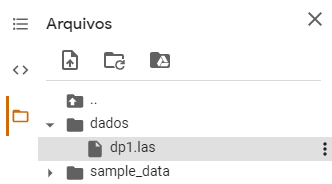

In [ ]:
# Lendo o arquivo LAS
well = lasio.read('dados/dp1.las')
print(well)

## Visualização dos perfis

Primeiro, vamos plotar os perfis básicos para ter uma análise prévia do dado. Para isso, é necessário saber como consultar as curvas presentes no arquivo LAS lido.


Após a leitura do arquivo LAS com a função "read" da biblioteca lasio, é possível consultar o conteúdo do arquivo lido com a função "sections". O que retorna dessa última função é um dicionário. Sendo assim, é possível consultar cada seção padrão do arquivo LAS individualmente, da forma como se consulta os valores de cada chave em um dicionário, de acordo como foi aprendido na aula anterior.

In [ ]:
# Conteúdo do arquivo LAS
print(well.sections)
# Ou apenas as chaves do dicionário gerado
print(well.sections.keys())
# Conteúdo de uma seção
print(well.sections['Version'])

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STAN...), HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...)], 'Well': [HeaderItem(mnemonic="STRT", unit="F", value="100.0", descr="START DEPTH"), HeaderItem(mnemonic="STOP", unit="F", value="7938.0", descr="STOP DEPTH"), HeaderItem(mnemonic="STEP", unit="F", value="0.5", descr="STEP VALUE"), HeaderItem(mnemonic="NULL", unit="", value="-999.0", descr="NULL VALUE"), HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"), HeaderItem(mnemonic="WELL", unit="", value="DREW POINT #1", descr="WELL"), HeaderItem(mnemonic="FLD", unit="", value="WILDCAT", descr="FIELD"), HeaderItem(mnemonic="LOC", unit="", value="26  18N   8W", descr="LOCATION"), HeaderItem(mnemonic="CNTY", unit="", value="NORTH SLOPE", descr="COUNTY"), HeaderItem(mnemonic="STAT", unit="", value="ALASKA", descr="STATE"), HeaderItem(mnemonic="CTRY", unit="", value="USA", descr="COUNTRY"), HeaderItem(mnemonic

### Formato LAS

O arquivo utilizado nessa atividade pertece ao formato LAS 2.0, criado por Canadian Well Logging Society. Por padrão o conteúdo do arquivo com o formato LAS 2.0 é dividido em seções: 

| Seções | Nome | 
|----------|------|
| ~V |  Version *| 
| ~W |  Well *|
| ~C | Curve *|
| ~P    | Parameter |
| ~O | Other |
| ~A     | ASCII Log Data *|

Para saber mais sobre o formato LAS 2.0: [LAS2.0-documentacao](http://www.cwls.org/wp-content/uploads/2017/02/Las2_Update_Feb2017.pdf)

### Conteúdo de uma seção na biblioteca lasio

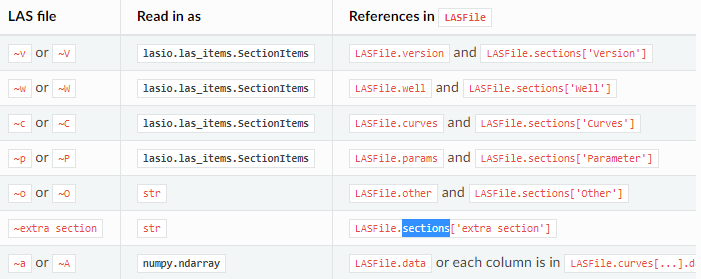

In [ ]:
# Visualizando o conteúdo de cada seção padrão do arquivo LAS
print(well.version)
print(well.well)
print(well.curves)
print(well.data)

Mnemonic  Unit  Value  Description                             
--------  ----  -----  -----------                             
VERS            2.0    CWLS LOG ASCII STANDARD - VERSION 2.00  
WRAP            NO     ONE LINE PER DEPTH STEP                 
Mnemonic  Unit  Value             Description             
--------  ----  -----             -----------             
STRT      F     100.0             START DEPTH             
STOP      F     7938.0            STOP DEPTH              
STEP      F     0.5               STEP VALUE              
NULL            -999.0            NULL VALUE              
COMP                              COMPANY                 
WELL            DREW POINT #1     WELL                    
FLD             WILDCAT           FIELD                   
LOC             26  18N   8W      LOCATION                
CNTY            NORTH SLOPE       COUNTY                  
STAT            ALASKA            STATE                   
CTRY            USA               CO

In [ ]:
# Acessando itens de uma seção
print(well.curves.DEPT)
print(well.curves.DEPT.unit)
print(well.curves.DEPT.data)

CurveItem(mnemonic="DEPT", unit="F", value="", descr="1  DEPTH", original_mnemonic="DEPT", data.shape=(15693,))
F
[ 100.   100.5  101.  ... 7945.  7945.5 7946. ]


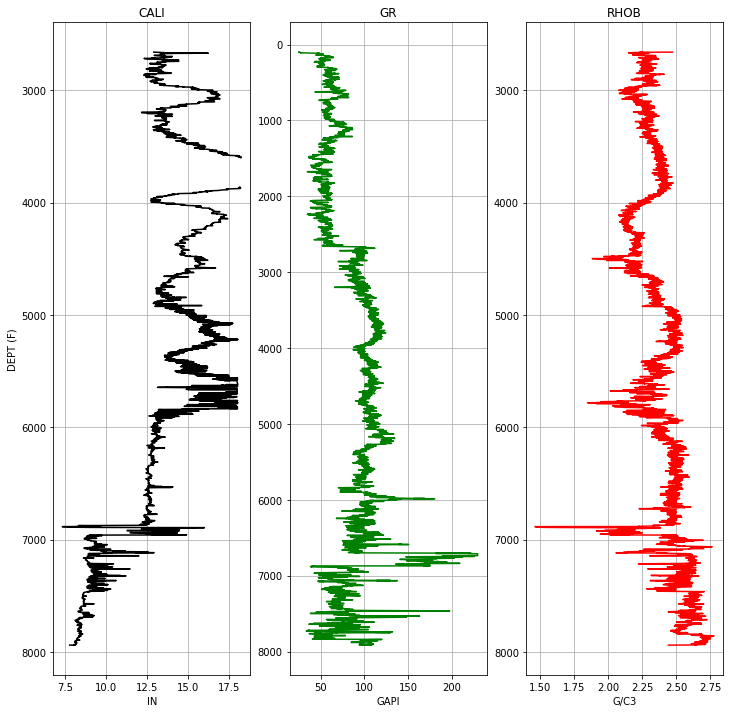

In [ ]:
# Visualizando as curvas presentes no poço DP1
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 12)

ax[0].plot(well.curves.CALI.data, well.curves.DEPT.data, color='black')
ax[0].set_title(well.curves.CALI.mnemonic)
ax[0].set_xlabel(well.curves.CALI.unit)
ax[0].set_ylabel(well.curves.DEPT.mnemonic + ' (' + well.curves.DEPT.unit + ')')
ax[0].invert_yaxis()
ax[0].grid()
ax[1].plot(well.curves.GR.data, well.curves.DEPT.data, color='green')
ax[1].set_title(well.curves.GR.mnemonic)
ax[1].set_xlabel(well.curves.GR.unit)
ax[1].invert_yaxis()
ax[1].grid()
ax[2].plot(well.curves.RHOB.data, well.curves.DEPT.data, color='red')
ax[2].set_title(well.curves.RHOB.mnemonic)
ax[2].set_xlabel(well.curves.RHOB.unit)
ax[2].invert_yaxis()
ax[2].grid()

In [ ]:
# Criando uma função para o plot de curvas
def plot_curves(well, depth, curves, colors, size = (12,12)):
    
    n_tracks = len(curves)

    fig, ax = plt.subplots(1, n_tracks, sharey=True)
    fig.set_size_inches(size)

    ax[0].set_ylabel(well.curves[depth].mnemonic + ' (' + well.curves[depth].unit + ')')
    ax[0].invert_yaxis()
    for i in range(n_tracks):
        ax[i].plot(well.curves[curves[i]].data, well.curves[depth].data, color=colors[i])
        ax[i].set_title(well.curves[curves[i]].mnemonic)
        ax[i].set_xlabel(well.curves[curves[i]].unit)
        ax[i].grid()

    plt.show()

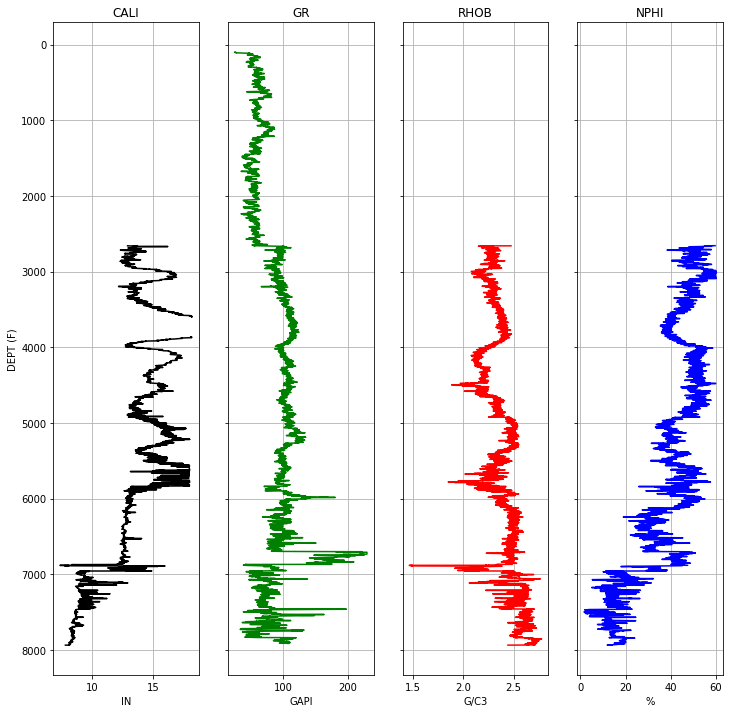

In [ ]:
# Plotando as curvas por meio da função criada
curves = ['CALI', 'GR', 'RHOB', 'NPHI']
colors = ['black','green', 'red', 'blue']
plot_curves(well, 'DEPT', curves, colors)

## K-means

O K-means é um dos métodos mais populares de classificação (*clustering*). O método consiste em dividir o dado de entrada em k subgrupos (clusters), sendo cada desse subgrupo contendo um ponto central (centróide).

O algoritmo possui 3 etapas, sendo a primeira a inicialização com as escolhas dos centróides. Após a inicialização, k-means consiste num laço entre as duas etapas seguintes: a primeira, relacionar cada amostra ao centróide mais perto e a segunda, cria novos centróides a partir da média das amostras atribuídas a cada centróide anterior.


A diferença entre o antigo e o novo centróide é calculada e o algoritmo repete essas duas últimas etapas até que este valor seja menor que um limite estipulado. Ou seja, repete até os centróides não se moverem de forma significativa

![kmeans](https://sandipanweb.files.wordpress.com/2017/03/kmeans3.gif)


### K-means no python

Para aplicar o método do k-means no python, vamos utilizar da biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html). Scikit-learn é uma biblioteca de *machine learning* de código aberto que oferece suporte ao aprendizado supervisionado e não supervisionado. Ela também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo e muitas outras.

Nessa atividade, usaremos o módulo *clustering* da biblioteca scikit-learn. Mais precisamente a função que executa o método do [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). Inicialmente vamos aplicar a função para duas dimensões. E num segundo momento, aplicar a função para três dimensões.

### K-means 2D

Selecionando as curvas de raios gamma (GR) e neutrão (NPHI) como dados de entrada. Primeiro vamos analisar num crossplot a disposição dos dados dessas curvas para esse poço.

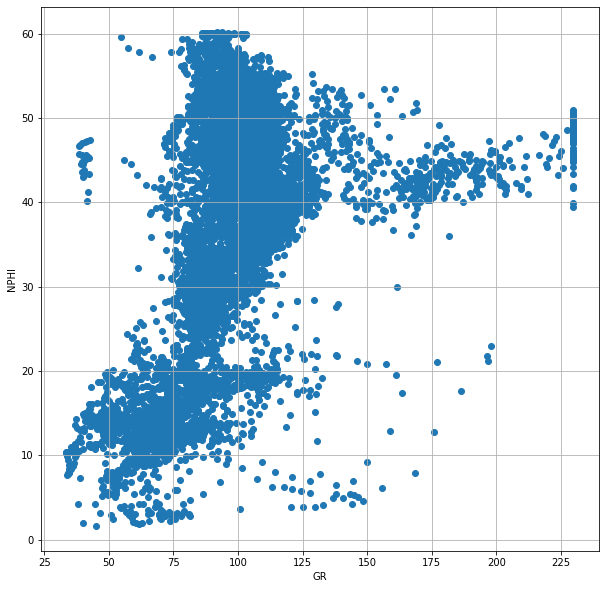

In [ ]:
# Visualização inicial dos dados.
plt.figure(figsize=(10,10))

plt.scatter(well.curves.GR.data, well.curves.NPHI.data)
plt.xlabel(well.curves.GR.mnemonic)
plt.ylabel(well.curves.NPHI.mnemonic)
plt.grid()
plt.show()

Criando uma matriz onde cada coluna é uma curva antes selecionada, nesse primeiro exemplo, a primeira coluna da matriz representa os dados da curva GR e a segunda coluna representa os dados da curva NPHI.

In [ ]:
# Criando a matriz "welllogdata" onde que cada coluna contém os dados de cada curva selecionada.
welllogdata = [well.curves.GR.data, well.curves.NPHI.data]
welllogdata = np.array(welllogdata).T
print(welllogdata)

[[25.1383     nan]
 [24.7342     nan]
 [24.9611     nan]
 ...
 [    nan     nan]
 [    nan     nan]
 [    nan     nan]]


In [ ]:
# Mapeando as posições que contém NaN.
nans = np.any(np.isnan(welllogdata), axis=1)
print(nans)

[ True  True  True ...  True  True  True]


In [ ]:
# Calculando a média e o desvio padrão para cada coluna da matriz.
# (desconsiderando os NaN com as funções np.nanmean e np.nanstd)
mean = np.nanmean(welllogdata, axis=0, keepdims=True)
std = np.nanstd(welllogdata, axis=0, keepdims=True)
print(mean)
print(std)

[[85.75319015 38.82669587]]
[[28.22759033 13.54149966]]


In [ ]:
# Normalizando os dados das curvas selecionadas.
welllogdata = (welllogdata - mean) / std
print(welllogdata)

[[-2.14736325         nan]
 [-2.16167903         nan]
 [-2.1536408          nan]
 ...
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]


In [ ]:
# importando a função KMeans da biblioteca scikit-learn.
from sklearn.cluster import KMeans

Até agora não realizamos nada a respeito do método k-means, apenas arrumamos o dado de forma que a aplicação do método fique mais interessante. A partir dessa etapa, começamos a aplicar o método de classificação do k-means.

Primeiro, precisamos definir o número de *clusters* de interesse. No contexto dessa atividade, cada cluster significa uma eletrofácie diferente. Ou seja, é importante essa informação ser definida a partir de um estudo prévio sobre a área.

Um bom exercício é alterar o número de clusters e comparar os resultados obtidos.

In [ ]:
# Escolhendo a quantidade de clusters e inicializando o método.
# A função KMeans possui mais argumentos além do número de clusters, por exemplo,
# escolher as posições iniciais de cada centróide, definir o critério de parada, etc.
# para saber mais a documentação pode ser consultada.
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [ ]:
# Criando o array de saída.
kmeans_data = np.full(welllogdata.shape[0], np.nan)
kmeans_data

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
# Removendo as posições onde contém NaN em qualquer uma das curvas.
welllogdata[~nans]

array([[-0.41486326,  1.39880402,  0.60168126],
       [-0.31063899,  1.40273268, -0.39095513],
       [-0.27073123,  1.28329982, -0.95901062],
       ...,
       [ 0.79539591, -1.64141317,  2.14159855],
       [ 0.78317382, -1.61264974,  2.08057316],
       [ 0.77259906, -1.57029106,  2.15847791]])

In [ ]:
# Obtendo a curva com os índices de cada clusters
kmeans_data[~nans] = kmeans.fit_predict(welllogdata[~nans])
kmeans_data

array([nan, nan, nan, ..., nan, nan, nan])

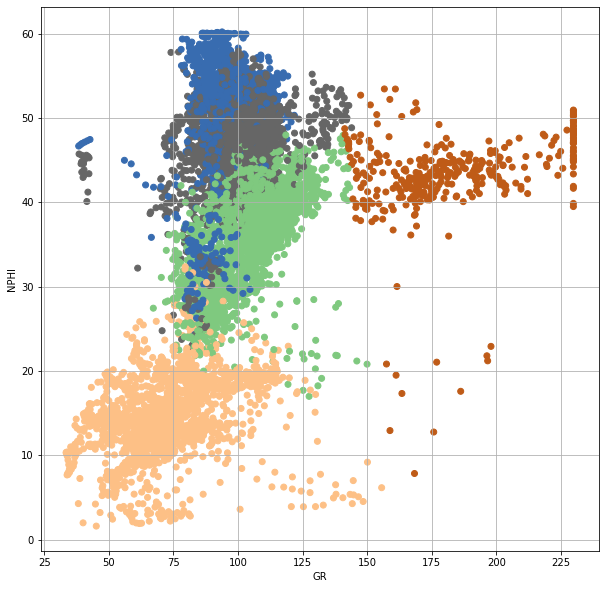

In [ ]:
# Visualizando o resultado final. 
# O crossplot inicial com a classificação obtida por meio do método k-means
plt.figure(figsize=(10,10))

plt.scatter(well.curves.GR.data, well.curves.NPHI.data, c=kmeans_data, cmap='Accent')
plt.xlabel(well.curves.GR.mnemonic)
plt.ylabel(well.curves.NPHI.mnemonic)
plt.grid()
plt.show()

### K-means 3D

Agora, como um segundo exemplo, aplicando o método do k-means em três dimensões.

Um bom exercício é criar uma função para aplicar o método do k-means para N dimensões.

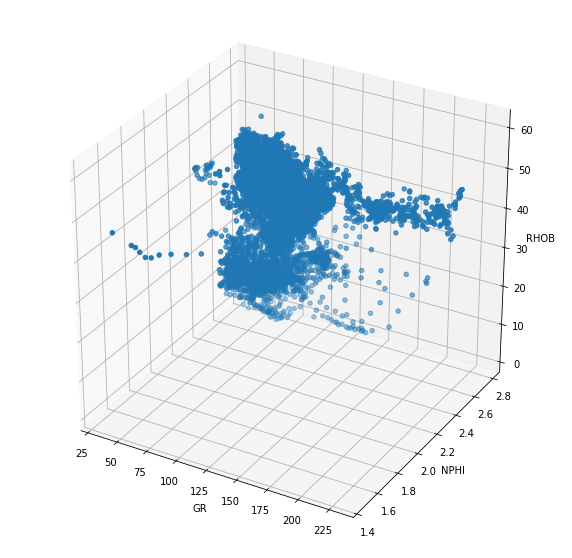

In [ ]:
# Visualização inicial dos dados
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(well.curves.GR.data,  well.curves.RHOB.data, well.curves.NPHI.data)
ax.set_xlabel(well.curves.GR.mnemonic)
ax.set_ylabel(well.curves.NPHI.mnemonic)
ax.set_zlabel(well.curves.RHOB.mnemonic)
plt.grid()
plt.show()

In [ ]:
welllogdata = [well.curves.GR.data, well.curves.NPHI.data, well.curves.RHOB.data]
welllogdata = np.array(welllogdata).T
nans = np.any(np.isnan(welllogdata), axis=1)
mean = np.nanmean(welllogdata, axis=0, keepdims=True)
std = np.nanstd(welllogdata, axis=0, keepdims=True)
welllogdata = (welllogdata - mean) / std

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans_data = np.full(welllogdata.shape[0], np.nan)
kmeans_data[~nans] = kmeans.fit_predict(welllogdata[~nans])

print(kmeans_data)

[nan nan nan ... nan nan nan]


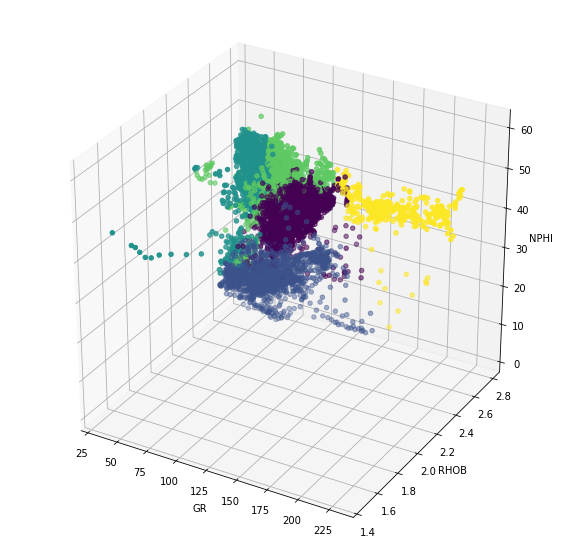

In [ ]:
# Visualização inicial dos dados
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(well.curves.GR.data,  well.curves.RHOB.data, well.curves.NPHI.data, c=kmeans_data)
ax.set_xlabel(well.curves.GR.mnemonic)
ax.set_zlabel(well.curves.NPHI.mnemonic)
ax.set_ylabel(well.curves.RHOB.mnemonic)
plt.grid()
plt.show()